Lab 1- Problem 1: Obtain response to an event- To obtain tweets for a specified hashtag 
------------------------------------------------------------------------------------------------------------------------------------

Libraries we are using for the assignment

In [2]:
library(twitteR) 
library("ggmap")
library("maptools")
library(maps)
library("RSQLite")
library(ggplot2)

My Twitter credentials

In [3]:
Consumer_key <- "RZNszQQgFyaSCmj7MZjcSoiA8"                     
Consumer_secret <- "9Vhl9klf5jhHPLqmvgizNYPzstcspiD44vnPaK7zSX2qDr0RWb"
Access_token <- "173808583-auhvsY9unIsuZIVh6z0ULIuyATFGwFi29gl9cZ0e"
Access_secret <- "iG0EUvLUTr1mdDICaYcvfZm20K4e76qG0Mt1zrEVpoH3S"
setup_twitter_oauth(Consumer_key,Consumer_secret,Access_token,Access_secret)

[1] "Using direct authentication"


ctags -- Search term

tweets -- contains 2500 records for the searched tweets

tweetsDF -- contains the tweets as a data frame 

In [ ]:
ctags<-"#SuperBowl" #Search term

#Fetches the tweets from the area based on the the search term
tweets <- searchTwitter(ctags,n=2500)

#register_sqlite_backend("TC") #Creates a db file called 'TweetCollection' which will store all the tweets in a table called 'tweets'
#store_tweets_db(tweets)       #Command to store tweets to database

tweetsDF<-twListToDF(tweets)


sname -- contains a list of Screen Names

lookupUsers(screen_name) function accepts screen names as a parameter and returns a list of userInfo

df -- accepts the list as a data frame in order to be written to a csv file. (Since csv files only accept data frames as a parameter)

In [ ]:
sname<-tweetsDF$screenName   #'$'=Used to access the elements of a data frame
dframe<-lookupUsers(sname)
df<-twListToDF(dframe)
write.csv(df,file="DIC1.csv")

library(dplyr) -- we want to use the filter function in our program that filters out and keeps only the records that have non 'NA' values as latitude and longitude 

bTweets - stores the userInfo obtained from the csv file

loc -- stores the location field of bTweets

In [5]:
library(dplyr)

bTweets <- read.csv(file="DIC1.csv", header=TRUE, sep=",")
#bTweets

loc<-(bTweets$location)
#loc  #Contains a list of locations like "Kansas,USA","Tulsa,USA"....

Table arranges the locations in a signle column and for all the records assigns a frequency

In [6]:
tab<-table(loc) 
#tab

The names i.e the locations are added in the address column and the frequency is added in the frequency column


In [7]:
unique<-data.frame(address=names(tab),frequency=c(tab)) 
#unique

Rownames are removed as the address column and the rownames become redundant

In [8]:
rownames(unique)<-NULL 
#unique

We bind the Address and Frequency columns of 'Freq' to the latitude and longitude columns obtained by geocode function so that we can use this to plot on a map.
We use filter to remove lat and longs that have values as 'NA'
    

In [9]:
freq<-unique   
freq <- cbind(freq, geocode(as.character(freq$address))) #the table containing address and frequency i.e freq is combined with lat and lon fields using geocode
#freq

freq<-filter(freq,lon!="",lat!="")

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%20Brazil,Rio%20de%20Janeiro%20%E2%88%9A&sensor=false
Warning message:
“geocode failed with status ZERO_RESULTS, location = " Brazil,Rio de Janeiro √"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%20Greenwich%20Village,NYC%20-%20Paris&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%20justinfollowed12.21.16&sensor=false
Warning message:
“geocode failed with status ZERO_RESULTS, location = " justinfollowed12.21.16"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%20RJ/022&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%20T%C3%BCrkiye&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%20USA%20%5CNashville%5CNY&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%20With%20

We plot the map using ggmap and add a layer of geom_point where we can plot points on the existing google map.

Here the catch is size=frequency. The frequency of tweets from a particular location decide the size of the blob on the map.

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=29.763284,-95.363271&zoom=4&size=640x640&scale=2&maptype=roadmap&language=en-EN&sensor=false
Warning message:
“Removed 251 rows containing missing values (geom_point).”

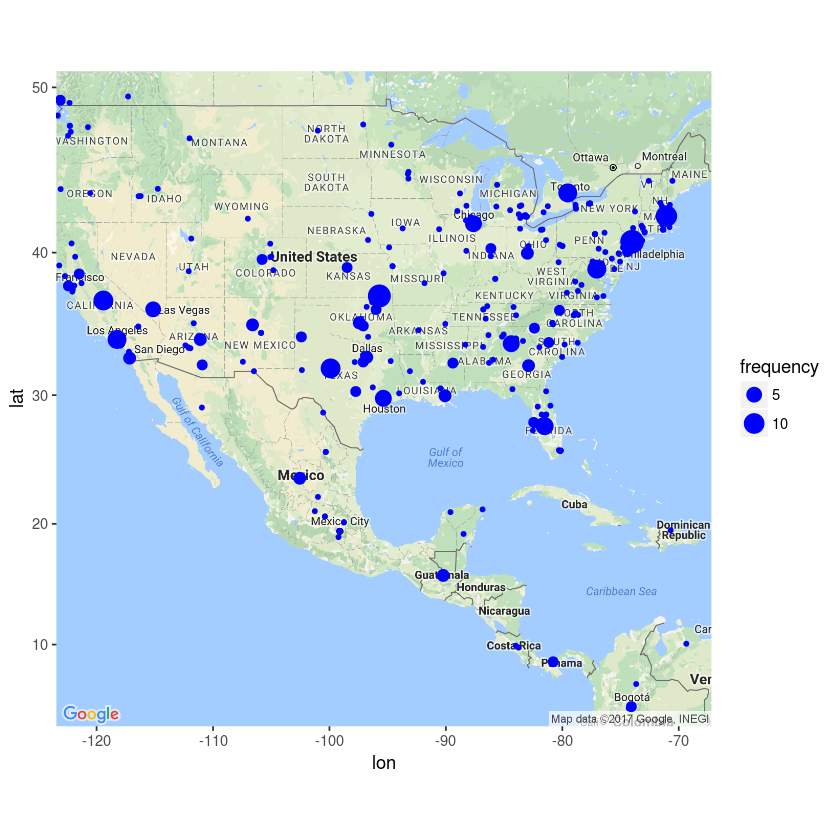

In [10]:
map = get_map(zoom=4, scale=2, source = "google", maptype="roadmap") #Creates a Google roadmap with zoom level 4

map.plot = ggmap(map)       #Creates a google map using ggmap

map.plot = map.plot + geom_point(data = freq, aes(x = lon, y = lat,size=frequency),colour="blue" )#Geom_point() is used to add plots above the original google maps

print(map.plot)